## CONVOLUTIONAL NEURAL NETWORK

NAME: TIMILEYIN SAMUEL AKINTILO

STUDENT ID: C00302909

#### INTRODUCTION

This notebook showcases the implemention of the convolutional neural network using the Keras library. The notebook used was obtained from github (https://github.com/balajisrinivas/Cats-Vs-Dogs-Prediction/blob/master/Cats%20Vs%20Dogs.ipynb) and various alterations were implemented to demostrate a significant practical and theoretical understanding of the underlying deep learning algorithm.

#### LOG OF CHANGES

This log embodies all the changes and alterations that were made on the original notebook, and the impact of those changes on the result of the analysis. The log is structured to follows the Cross Industry Standard Process for Data Mining (CRISP-DM) model, and the changes were logged under each of the six phases as follows:

**1. Business understanding**

This project is a classification task which aims to classify cats and dog images. This analysis is focused on building a robust deep learning algorithm that will classify pet images to determine if its a dog or a cat. The model will provide valuable assistance to pet owners,and animal welfare organizations, and veterinarians.

**2. Data Understanding**

This  analysis makes use of the cat and dog dataset provided by Microsoft  (https://www.microsoft.com/en-us/download/details.aspx?id=54765). The dataset contains contains about 25,000 images of cats and dogs. However, for the purpose of the study, a small portion of this dataset was used to make the analysis simplier and to minimize the model's training time.

**3. Data Preparation**

In the data preprocessing stage, the size of the pet images were reduced before feeding them into the model. This is to improve computational efficiency and reduce memory usage during model training and inference. Also, the images were normalized to a convinent size to ensure uniformity in the input data.

**4. Modelling**

The following changes were implemented during the modelling phase:

**a) Change of dataset**

**Change:** The original notebook made use of 25,000 pet images for the classification task, however this study used 2,400 pet images

**Result:** The highest validation accuracy obtained in the project is close enough (0.74) to that of the original notebook (0.83).

**b) Data processing variations**

**Change:** To account for the small dataset used, different alterations were made to how the data was processed. Different image sizes were tested and the images were not converted to grayscale.

**Result:** The alterations accounted for the small dataset used as the validation accuracy was close to that of the original notebook.

**c) Variations of model architecture**

**Change:** Various architectures were created and use to train the model to obtain a better accuracy.

**Result:** The best accuracy was obtained with two convolutional and dense layers with the addition of dropouts, while using Root Mean Square Propagation (RMSprop) as the optimizer.


**4. Evaluation:**

The performance of the model was evaluated using accuracy as the metric.

**5. Deployment:**

The best model was saved as an Hierarchical Data Format version 5 (HDF5) file but was not deployed due to time constraint.


First things first, we will import the required libraries.

In [2]:
# import the necessary packages
import numpy as np
import random
import os
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline


Since the pet images data is located on google drive, we will mount the drive to gain access to the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Since we will be traimig the model using GPU, we will confirm that we are connected to the GPU.

In [ ]:
# Confirm that we can connect to GPU with tensorflow
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Next, we will define the path to the data on Google drive

In [ ]:
# define the path to the training and testing directories
DIRECTORY = r'/content/drive/MyDrive/Colab Notebooks/PetImages1'

CATEGORIES = ['Cat', 'Dog']

Now, let read one image from the dataset and display it using OpenCV and Matplotlib.

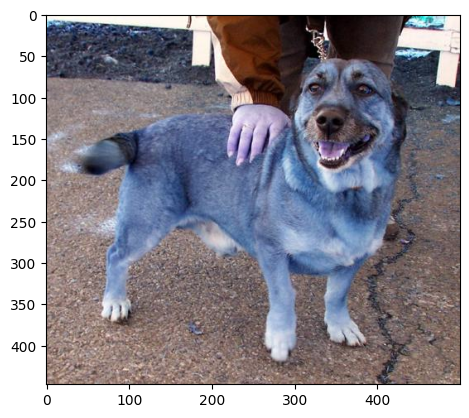

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        plt.imshow(arr)
        break

Now, let's resize the images to a fixed size. We will also create a list to store the resized images and their corresponding labels.

In [ ]:
# Record the starting time
start_time = time.time()

# set the image size to 100x100 pixels
img_size = 100
data = []

# loop through the categories
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)
        if arr is None or arr.size == 0:
            continue
        new_arr = cv2.resize(arr, (img_size, img_size))
        data.append([new_arr, label])

# Record the ending time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 32.32038688659668 seconds


In [ ]:
# print the number of images in the data
print(len(data))

2398


Now, we will split the data into features and labels. First we will shuffle the images for randomness.

In [ ]:
# shuffle the data
random.shuffle(data)

In [ ]:
# Split the data into features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

To keep the input data within the same size, we will normalize the images.

In [ ]:
# Normalize the data
X = np.array(X) / 255.0

In [ ]:
# print the first image
X[0]

array([[[0.        , 0.        , 0.        ],
        [0.00392157, 0.        , 0.00784314],
        [0.00784314, 0.        , 0.01960784],
        ...,
        [0.        , 0.01960784, 0.01176471],
        [0.00392157, 0.        , 0.02745098],
        [0.07058824, 0.16862745, 0.18039216]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.        , 0.00784314],
        [0.00784314, 0.00392157, 0.01568627],
        ...,
        [0.01960784, 0.05490196, 0.03921569],
        [0.01568627, 0.        , 0.01568627],
        [0.00784314, 0.        , 0.01176471]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.00784314],
        ...,
        [0.00392157, 0.00784314, 0.        ],
        [0.00784314, 0.        , 0.        ],
        [0.02352941, 0.01176471, 0.00784314]],

       ...,

       [[0.01960784, 0.01960784, 0.07058824],
        [0.00784314, 0.01176471, 0.06666667],
        [0.00784314, 0

In [ ]:
# print the shape of the data
X.shape

(2398, 100, 100, 3)

Now, we will import the Keras library.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


We will now build the CNN architecture

In [ ]:
# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Add the Dense layer
model.add(Dense(128, activation='relu', input_shape=X.shape[1:]))

# Add the output layer
model.add(Dense(2, activation='softmax'))



In [ ]:
# Now we will add the loss function and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

We will now proceed to train the model in 5 epochs

In [ ]:
# Record the starting time
start_time = time.time()

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Fit the model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

# Record the ending time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time:", elapsed_time, "seconds")

Epoch 1/5
68/68 [==============================] - 3s 21ms/step - loss: 0.7454 - accuracy: 0.5403 - val_loss: 0.6879 - val_accuracy: 0.5292
Epoch 2/5
68/68 [==============================] - 1s 17ms/step - loss: 0.6794 - accuracy: 0.5853 - val_loss: 0.6770 - val_accuracy: 0.6167
Epoch 3/5
68/68 [==============================] - 1s 17ms/step - loss: 0.6241 - accuracy: 0.6543 - val_loss: 0.6590 - val_accuracy: 0.6667
Epoch 4/5
68/68 [==============================] - 1s 16ms/step - loss: 0.5647 - accuracy: 0.7104 - val_loss: 0.6406 - val_accuracy: 0.6417
Epoch 5/5
68/68 [==============================] - 1s 15ms/step - loss: 0.4557 - accuracy: 0.7757 - val_loss: 0.6557 - val_accuracy: 0.6917
Elapsed time: 8.069846153259277 seconds


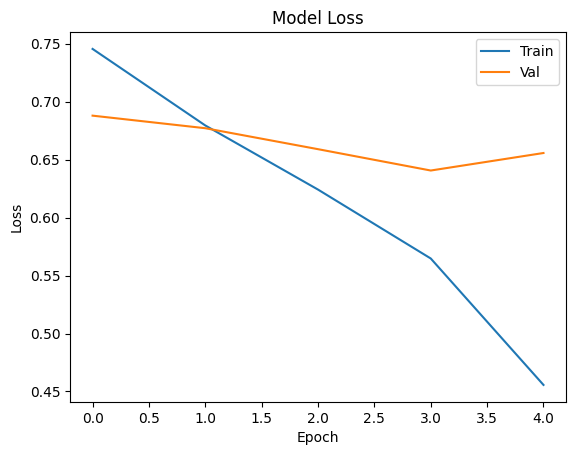

In [ ]:
# Plot the loss and accuracy
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


To improve the model's performance, we will build another architecture with four Convolutional and dense layers.

In [ ]:
# create another model

#np.random.seed(42)
tf.random.set_seed(42)


# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Add the Dense layer
model.add(Dense(128, activation='relu', input_shape=X.shape[1:]))

# Add the Dense layer
model.add(Dense(128, activation='relu'))

# Add the Dense layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(2, activation='softmax'))



In [ ]:
# Now we will add the loss function and Stochastic Gradient Descent (SGD) optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [ ]:
# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Fit the model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
68/68 [==============================] - 4s 23ms/step - loss: 0.6937 - accuracy: 0.5074 - val_loss: 0.6885 - val_accuracy: 0.5875
Epoch 2/5
68/68 [==============================] - 1s 18ms/step - loss: 0.6797 - accuracy: 0.5797 - val_loss: 0.6564 - val_accuracy: 0.5958
Epoch 3/5
68/68 [==============================] - 1s 16ms/step - loss: 0.6652 - accuracy: 0.5987 - val_loss: 0.6475 - val_accuracy: 0.6083
Epoch 4/5
68/68 [==============================] - 1s 16ms/step - loss: 0.6307 - accuracy: 0.6455 - val_loss: 0.6288 - val_accuracy: 0.6292
Epoch 5/5
68/68 [==============================] - 1s 16ms/step - loss: 0.6037 - accuracy: 0.6733 - val_loss: 0.6296 - val_accuracy: 0.6333


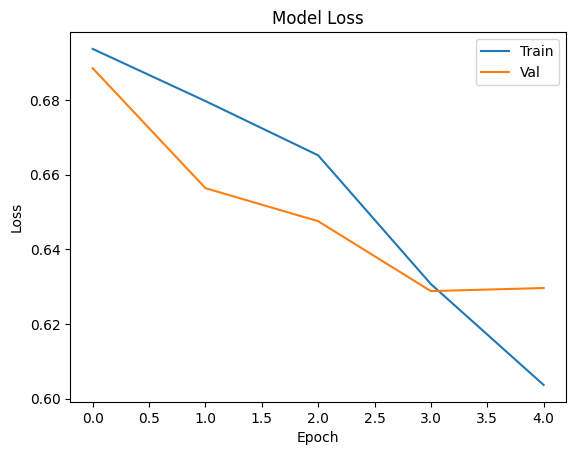

In [ ]:
# Plot the loss and accuracy
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


This had little effect on the accuracy of the model.



Next, we will add dropout to the architecture and also change the activation function.

In [ ]:
# Set random seed
np.random.seed(43)
tf.random.set_seed(43)

# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])



In [ ]:
# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Fit the model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
68/68 [==============================] - 2s 18ms/step - loss: 0.6927 - accuracy: 0.5097 - val_loss: 0.6892 - val_accuracy: 0.5125
Epoch 2/5
68/68 [==============================] - 1s 15ms/step - loss: 0.6907 - accuracy: 0.5162 - val_loss: 0.6890 - val_accuracy: 0.5625
Epoch 3/5
68/68 [==============================] - 1s 15ms/step - loss: 0.6882 - accuracy: 0.5459 - val_loss: 0.6855 - val_accuracy: 0.5750
Epoch 4/5
68/68 [==============================] - 1s 16ms/step - loss: 0.6851 - accuracy: 0.5658 - val_loss: 0.6833 - val_accuracy: 0.5750
Epoch 5/5
68/68 [==============================] - 1s 14ms/step - loss: 0.6846 - accuracy: 0.5653 - val_loss: 0.6814 - val_accuracy: 0.5542


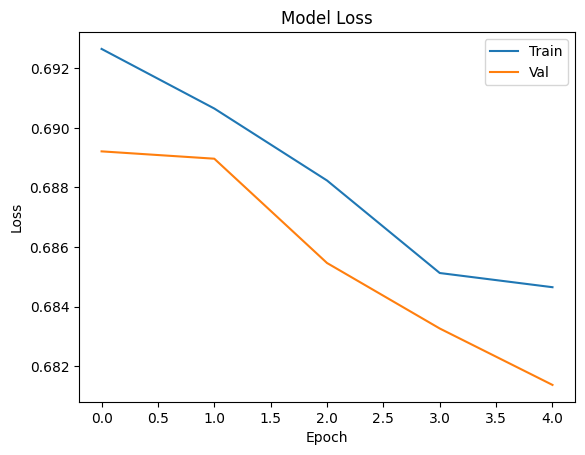

In [ ]:
# Plot the loss and accuracy
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [ ]:
# Set random seed
np.random.seed(43)
tf.random.set_seed(43)

# Create the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the data
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])



In [ ]:
# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

# Fit the model
model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
68/68 [==============================] - 3s 21ms/step - loss: 1.0517 - accuracy: 0.5310 - val_loss: 0.6909 - val_accuracy: 0.5458
Epoch 2/5
68/68 [==============================] - 1s 17ms/step - loss: 0.6816 - accuracy: 0.5862 - val_loss: 0.6724 - val_accuracy: 0.6500
Epoch 3/5
68/68 [==============================] - 1s 17ms/step - loss: 0.6418 - accuracy: 0.6460 - val_loss: 0.6463 - val_accuracy: 0.6292
Epoch 4/5
68/68 [==============================] - 1s 17ms/step - loss: 0.5891 - accuracy: 0.6909 - val_loss: 0.6213 - val_accuracy: 0.6792
Epoch 5/5
68/68 [==============================] - 1s 17ms/step - loss: 0.5384 - accuracy: 0.7437 - val_loss: 0.5783 - val_accuracy: 0.7375


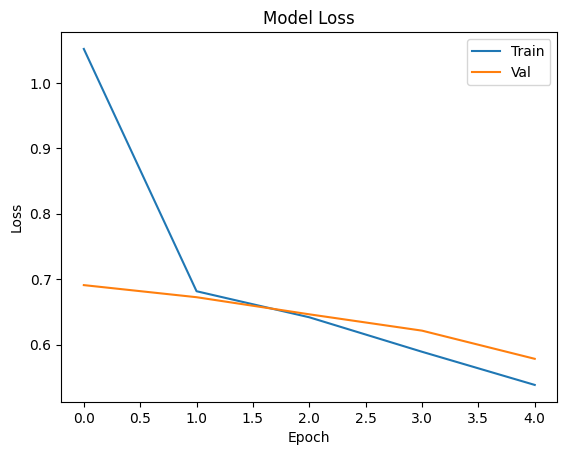

In [ ]:
# Plot the loss and accuracy
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


The best validation accuracy was obtained when dropout was added to the model and the optimizer was changed to  Root Mean Square Propagation (RMSprop).

Now we will save the model

In [ ]:
# Save the model
model.save('/content.h5')


BIBLOGRAPHY

https://github.com/balajisrinivas/Cats-Vs-Dogs-Prediction/blob/master/Cats%20Vs%20Dogs.ipynb


https://www.microsoft.com/en-us/download/details.aspx?id=54765